# Preparation

Research Details | Links:

NYC Marathons Analytics
http://www.tcsnycmarathon.org/analytics

New York Times 
http://nyti.ms/2vaTpYi

Related Links 
New York Times | Skipping the full course
http://nyti.ms/2t9anF7

New York Times |  
http://nyti.ms/2vaTpYi

Important women:
Nina Kuscsik: 
https://de.wikipedia.org/wiki/Nina_Kuscsik
Bobi Gibb: 
https://en.wikipedia.org/wiki/Bobbi_Gibb


COLOR CODE MEN: #81D8D0 (mint) | COLOR CODE WOMEN: #5B9EFF (darkblue)

In [122]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [123]:
df_marathon_ny = pd.read_excel("NY_Marathon_clean.xlsx")
df_marathon_ny.head(20)

,date,m_winner,m_country,m_time,f_winner,f_country,f_time,m_starter,f_starter,total_starter,m_finisher,f_finisher,total_finisher
0,2016,Ghirmay Ghebreslassie,(ERI),02:07:51,Mary Keitany,(KEN),02:24:26,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,Stanley Kipleting Biwott,(KEN),02:10:34,Mary Keitany,(KEN),02:24:25,29291.0,20944.0,50235.0,28899.0,20696.0,49595.0
2,2014,Wilson Kipsang,(KEN),02:10:59,Mary Keitany,(KEN),02:25:07,30324.0,20572.0,50896.0,30108.0,20422.0,50530.0
3,2013,Geoffrey Kiprono Mutai,(KEN),02:08:24,Priscah Jeptoo,(KEN),02:25:07,31002.0,19738.0,50740.0,30699.0,19567.0,50266.0
4,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011,Geoffrey Kiprono Mutai,(KEN),02:05:06,Firehiwot Dado,(ETH),02:23:15,30200.0,17563.0,47763.0,30068.0,17272.0,47340.0
6,2010,Gebregziabher Gebremariam,(ETH),02:08:14,Edna Ngeringwony Kiplagat,(KEN),02:28:20,29097.0,16253.0,45350.0,28948.0,16155.0,45103.0
7,2009,Mebrahtom Keflezighi,(USA),02:09:15,Derartu Tulu,(ETH),02:28:52,28808.0,15369.0,44177.0,28485.0,15175.0,43660.0
8,2008,Marílson dos Santos,(BRA),02:08:43,Paula Radcliffe,(GBR),02:23:56,25669.0,13163.0,38832.0,25216.0,12880.0,38096.0
9,2007,Martin Kiptoo Lel,(KEN),02:09:04,Paula Radcliffe,(GBR),02:23:09,26525.0,12740.0,39265.0,26072.0,12535.0,38607.0


In [124]:
df_marathon_ny.index

RangeIndex(start=0, stop=47, step=1)

In [125]:
df_marathon_ny = df_marathon_ny.set_index('date')
df_marathon_ny

,m_winner,m_country,m_time,f_winner,f_country,f_time,m_starter,f_starter,total_starter,m_finisher,f_finisher,total_finisher
date,,,,,,,,,,,,
2016,Ghirmay Ghebreslassie,(ERI),02:07:51,Mary Keitany,(KEN),02:24:26,NaN,NaN,NaN,NaN,NaN,NaN
2015,Stanley Kipleting Biwott,(KEN),02:10:34,Mary Keitany,(KEN),02:24:25,29291.0,20944.0,50235.0,28899.0,20696.0,49595.0
2014,Wilson Kipsang,(KEN),02:10:59,Mary Keitany,(KEN),02:25:07,30324.0,20572.0,50896.0,30108.0,20422.0,50530.0
2013,Geoffrey Kiprono Mutai,(KEN),02:08:24,Priscah Jeptoo,(KEN),02:25:07,31002.0,19738.0,50740.0,30699.0,19567.0,50266.0
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,Geoffrey Kiprono Mutai,(KEN),02:05:06,Firehiwot Dado,(ETH),02:23:15,30200.0,17563.0,47763.0,30068.0,17272.0,47340.0
2010,Gebregziabher Gebremariam,(ETH),02:08:14,Edna Ngeringwony Kiplagat,(KEN),02:28:20,29097.0,16253.0,45350.0,28948.0,16155.0,45103.0
2009,Mebrahtom Keflezighi,(USA),02:09:15,Derartu Tulu,(ETH),02:28:52,28808.0,15369.0,44177.0,28485.0,15175.0,43660.0
2008,Marílson dos Santos,(BRA),02:08:43,Paula Radcliffe,(GBR),02:23:56,25669.0,13163.0,38832.0,25216.0,12880.0,38096.0


# Part 1 – Starters 

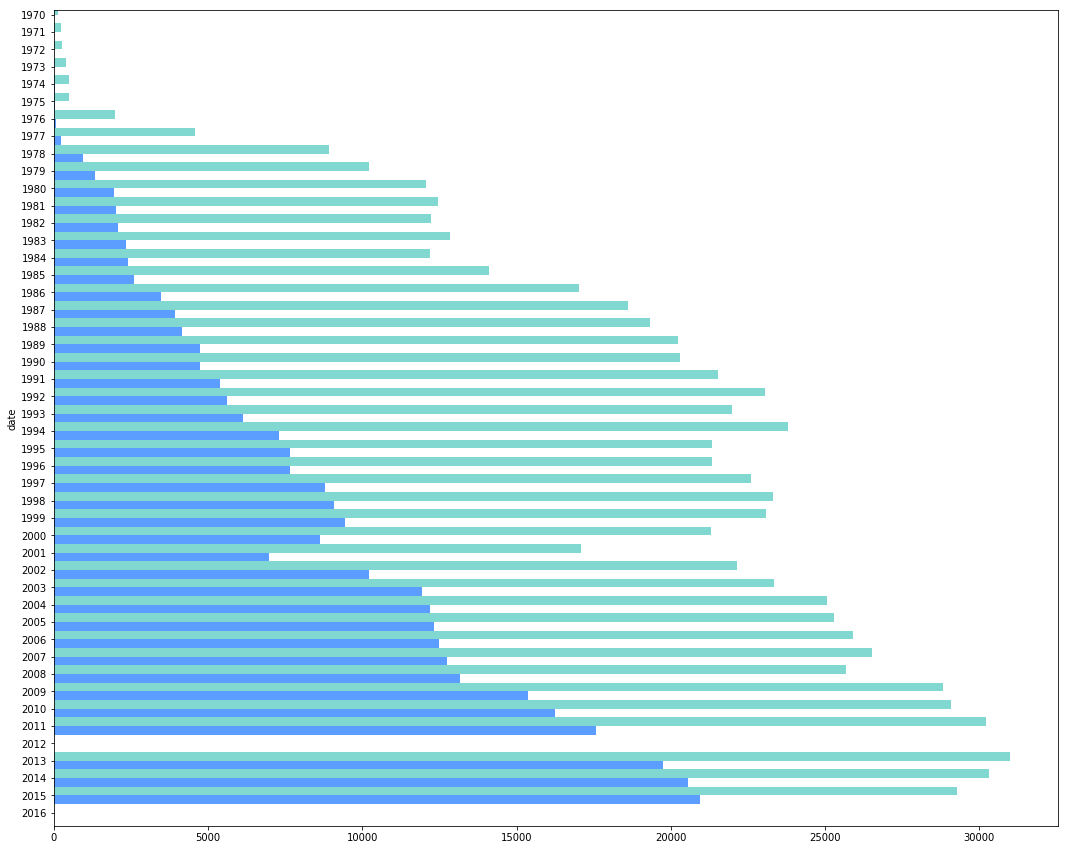

In [126]:
fig, ax = plt.subplots()

df_marathon_ny['m_starter'].plot(color='#81D8D0', ax=ax, position=0, kind='barh', figsize=(18,15), label='men starter')
df_marathon_ny['f_starter'].plot(color='#5B9EFF', ax=ax, position=1, kind='barh', figsize=(18,15), label='women starter')
#plt.ylabel('US dollars/capita, 1996–2016', fontsize=10)
#plt.xlabel('Year', fontsize=10)

plt.savefig("marathon_graph_starters.pdf")

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df_marathon_ny['m_starter'].plot(color='#81D8D0', ax=ax, figsize=(10,4), label='men starter')
df_marathon_ny['f_starter'].plot(color='#5B9EFF', ax=ax, figsize=(10,4), label='women starter')
#plt.ylabel('US dollars/capita, 1996–2016', fontsize=10)
#plt.xlabel('Year', fontsize=10)

#plt.savefig("marathon_graph_starters.pdf")

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df_marathon_ny['m_starter'].plot(color='#81D8D0', ax=ax, position=0, kind='bar', figsize=(18,6), label='men starter')
df_marathon_ny['f_starter'].plot(color='#5B9EFF', ax=ax, position=1, kind='bar', figsize=(18,6), label='women starter')
#plt.ylabel('US dollars/capita, 1996–2016', fontsize=10)
#plt.xlabel('Year', fontsize=10)

plt.savefig("marathon_graph_2.pdf")

# Part 2 – Countries

In [ ]:
df_marathon_ny['m_country'].sort_values(ascending=True)

In [ ]:
#MEN and WOMEN | total per Country
fig, ax = plt.subplots()
df_marathon_ny.groupby('m_country')['m_winner'].count().sort_values(ascending=True).plot(color='#81D8D0', figsize=(10,6), kind='barh', ax=ax, position=0)
df_marathon_ny.groupby('f_country')['f_winner'].count().sort_values(ascending=True).plot(color='#5B9EFF', figsize=(10,6), kind='barh', ax=ax, position=1)
#plt.savefig("marathon_graph_countries.pdf")

In [ ]:
#MEN | Winner | Countries
df_marathon_ny.groupby('m_country')['m_winner'].count().sort_values(ascending=False)

In [ ]:
#MEN / per Countries / total Winners
df_marathon_ny.groupby('m_country')['m_winner'].count().sort_values(ascending=True).plot(color='#81D8D0', figsize=(10,5), kind='barh')

In [ ]:
#WOMEN / Winner  / Countries
df_marathon_ny.groupby('f_country')['f_winner'].count().sort_values(ascending=False)

In [ ]:
#WOMEN / per Countries / total Winners
df_marathon_ny.groupby('f_country')['f_winner'].count().sort_values(ascending=True).plot(color='#5B9EFF', figsize=(10,5), kind='barh')


In [ ]:
#MEN / Countries per Winner
df_marathon_ny.groupby('m_winner')['m_country'].sum().sort_values(ascending=False)

In [ ]:
#MEN / per Winners / Countries
df_marathon_ny.groupby('m_country')['m_winner'].value_counts(ascending=True).sort_values().plot(color='#81D8D0', kind='barh', figsize=(5,10))

In [ ]:
#MEN / per Winners / Countries
df_marathon_ny.groupby('m_country')['m_winner'].value_counts(ascending=True).sort_values().plot(color='#81D8D0', kind='barh', figsize=(5,10))

# PART 3 – TIME

In [ ]:
df_marathon_ny['m_time']

In [ ]:
df_marathon_ny.m_time.astype(int)

In [ ]:
def geocode(row):
    if pd.notnull(row['country']):
        url = 'https://maps.googleapis.com/maps/api/geocode/json'
        keys = {
            'address': row['country'],
            'key': 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
        }
        response = requests.get(url, params=keys)
        result = response.json()
        if len(result['results']) == 1:
            return result['results'][0]['geometry']['location']
    return np.nan

df['geo'] = df.apply(geocode, axis=1)

df = df.merge(df['geo'].astype('str').str.extract(' (?P<geo_lat>[\d.]+),.* (?P<geo_lon>[\d.]+)}', expand=False), left_index=True, right_index=True)
df['geo_lat'] = df['geo_lat'].astype('float')
df['geo_lon'] = df['geo_lon'].astype('float')
df.drop('geo', axis=1, inplace=True)